# Predicting Half Circles from sklearn

In [ ]:
import tensorflow as tf
from sklearn.datasets import make_moons

In [ ]:
# (X_train, y_train), (X_test, y_test) = make_moons(1000)
X, y = make_moons(1000)

In [ ]:
X

array([[ 0.50363926, -0.36811636],
       [-0.09116202,  0.99583607],
       [-0.91742927,  0.39789889],
       ...,
       [ 1.79701181, -0.10396372],
       [ 0.29847979, -0.21264956],
       [ 0.27045565,  0.96273243]])

In [ ]:
y

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

# Visualizing Data

In [ ]:
X_train[0], y_train[0]

(array([ 1.84708289, -0.0314608 ]), 1)

In [ ]:
set(y_train)

{0, 1}

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Test data\nSamples: 200')

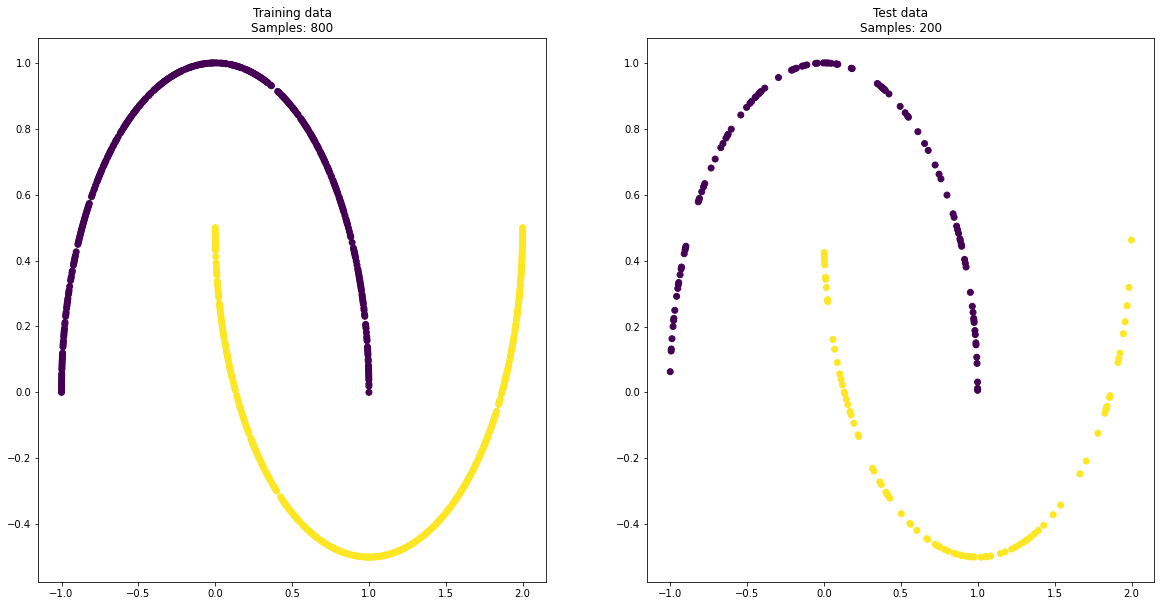

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.title(f'Training data\nSamples: {len(X_train)}')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.title(f'Test data\nSamples: {len(X_test)}')

# Modelling

#### Looking for best lr

In [ ]:
tf.random.set_seed(42)
moons_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

moons_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer='Adam',
                    metrics=['accuracy'])

lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

moons_history = moons_model.fit(X_train, y_train, epochs=70, callbacks=[lr_callback], verbose=1)

Epoch 1/70
25/25 [==============================] - 1s 4ms/step - loss: 0.7042 - accuracy: 0.5688 - lr: 0.0010
Epoch 2/70
25/25 [==============================] - 0s 4ms/step - loss: 0.6822 - accuracy: 0.6712 - lr: 0.0011
Epoch 3/70
25/25 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.7625 - lr: 0.0013
Epoch 4/70
25/25 [==============================] - 0s 4ms/step - loss: 0.6314 - accuracy: 0.8650 - lr: 0.0014
Epoch 5/70
25/25 [==============================] - 0s 4ms/step - loss: 0.5837 - accuracy: 0.8637 - lr: 0.0016
Epoch 6/70
25/25 [==============================] - 0s 3ms/step - loss: 0.5120 - accuracy: 0.8637 - lr: 0.0018
Epoch 7/70
25/25 [==============================] - 0s 6ms/step - loss: 0.4325 - accuracy: 0.8863 - lr: 0.0020
Epoch 8/70
25/25 [==============================] - 0s 4ms/step - loss: 0.3599 - accuracy: 0.8963 - lr: 0.0022
Epoch 9/70
25/25 [==============================] - 0s 4ms/step - loss: 0.3050 - accuracy: 0.8925 - lr: 0.0025
E

In [ ]:
moons_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 2.9354e-06 - accuracy: 1.0000


[2.9353559511946514e-06, 1.0]

By accident I already found the best solution - it is a simple problem so we don't need so sophisticated model

In [ ]:
import pandas as pd

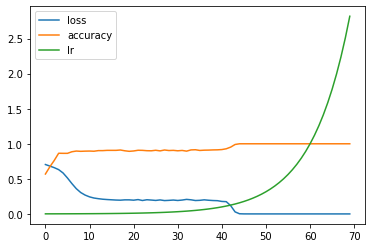

In [ ]:
pd.DataFrame(moons_history.history).plot()

In [ ]:
min_x = -1.2
max_x = 2.2
min_y = -.5
max_y = 1

In [ ]:
moons_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 5)                 15        
                                                                 
 dense_49 (Dense)            (None, 5)                 30        
                                                                 
 dense_50 (Dense)            (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np

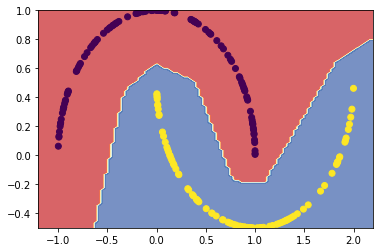

In [ ]:
heatmap = []
for i in np.linspace(min_x, max_x, 100):
  for j in np.linspace(min_y, max_y, 100):
    heatmap.append([i, j])
heatmap = moons_model.predict(heatmap)
heatmap = heatmap.reshape(100, 100)
heatmap = heatmap.round().transpose()


plt.contourf(np.linspace(min_x, max_x, 100), np.linspace(min_y, max_y, 100), heatmap, cmap=plt.cm.RdYlBu, alpha=.7)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)